# Exploring Hacker News Posts

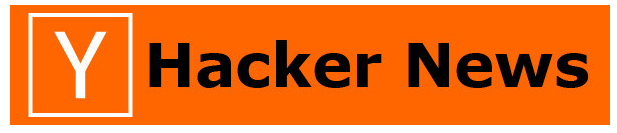

In this project, we'll work with a dataset of submissions to popular technology site [Hacker News](https://news.ycombinator.com/).

Hacker News is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

You can find the [data set here](https://www.kaggle.com/hacker-news/hacker-news-posts), but note that we have reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions. Below are descriptions of the columns:


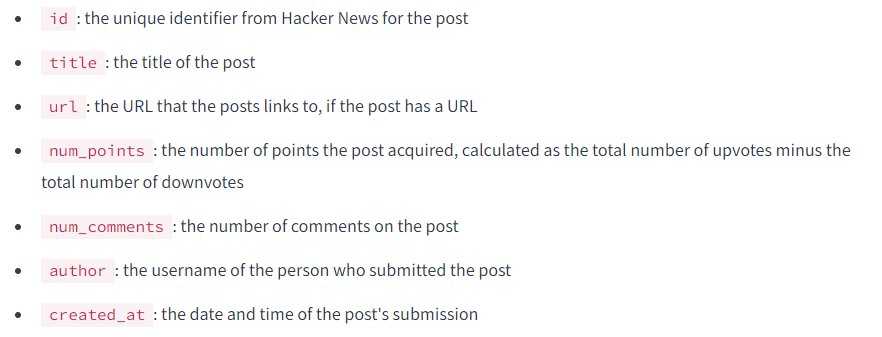

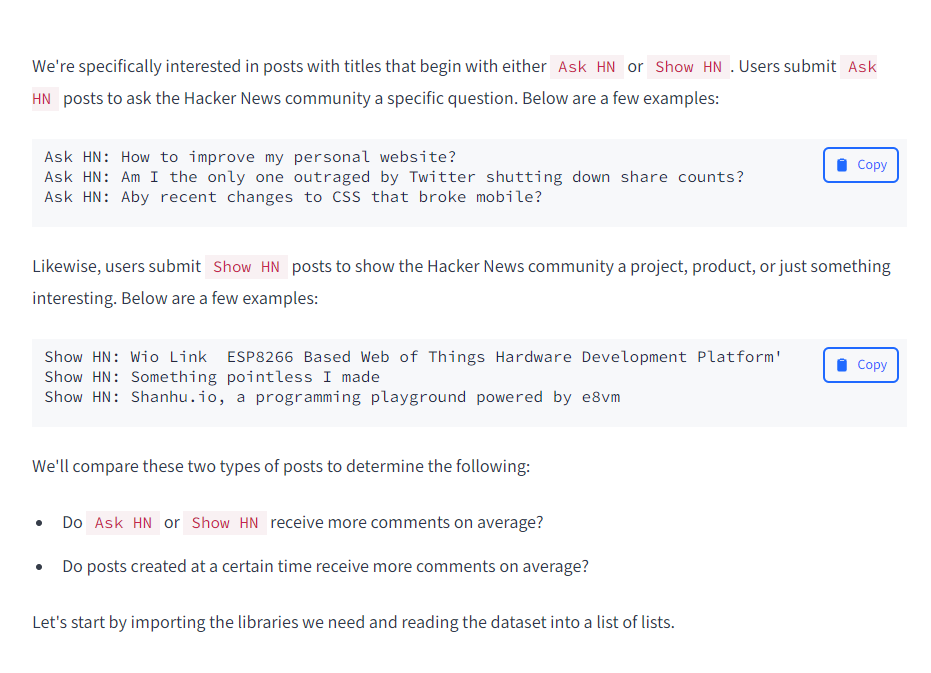

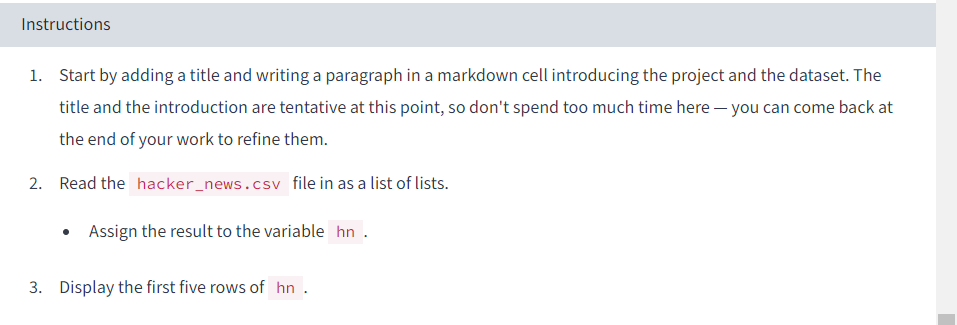

In [1]:
opened_file = open('hacker_news.csv')

from csv import reader

# Read the hacker_news.csv file in as a list of lists.
read_file = reader(opened_file)

# Assign the result to the variable hn.
hn = list(read_file)

# Display the first five rows of hn.
for row in hn[:5]:
    print(row)
    print()
    

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']



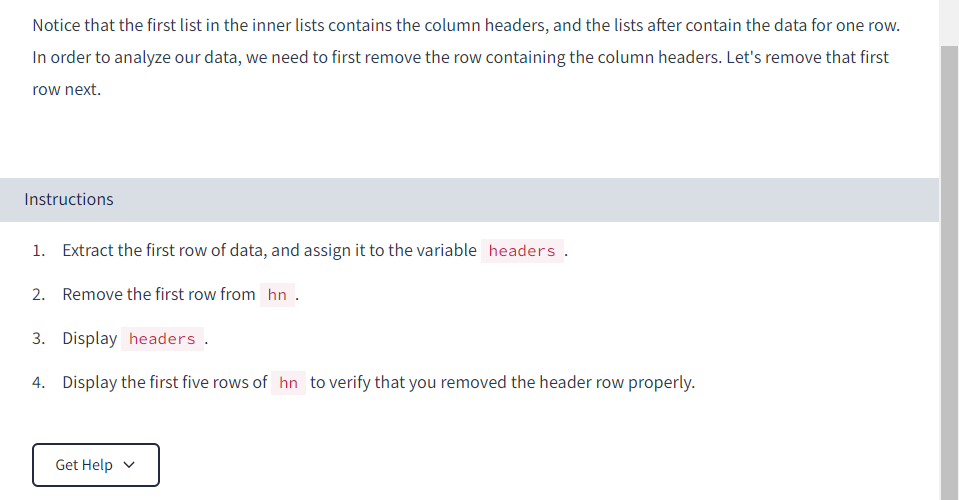

In [2]:
# Extract the first row of data, and assign it to the variable headers.
headers = hn[0]

# Remove the first row from hn.
hn = hn[1:]

# Display headers.
print(headers)
print('--------------------------------------------------------------------------------------------------------------------')

# Display the first five rows of hn to verify that you removed the header row properly.
for row in hn[:5]:
    print(row)
    print()


['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
--------------------------------------------------------------------------------------------------------------------
['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']

['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']

['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http

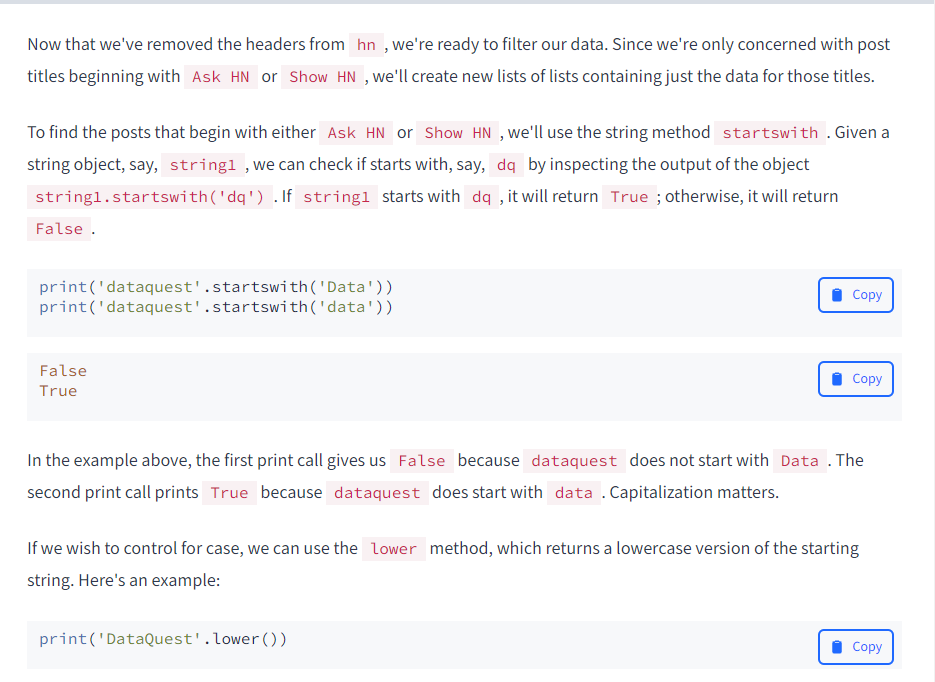

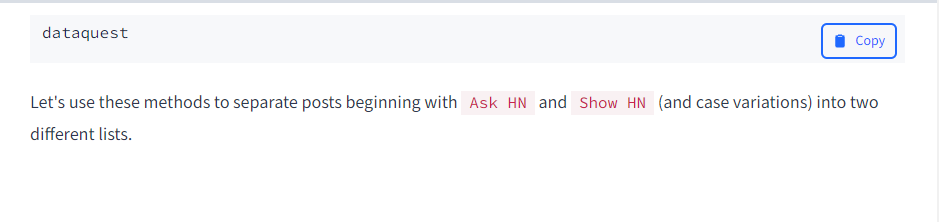

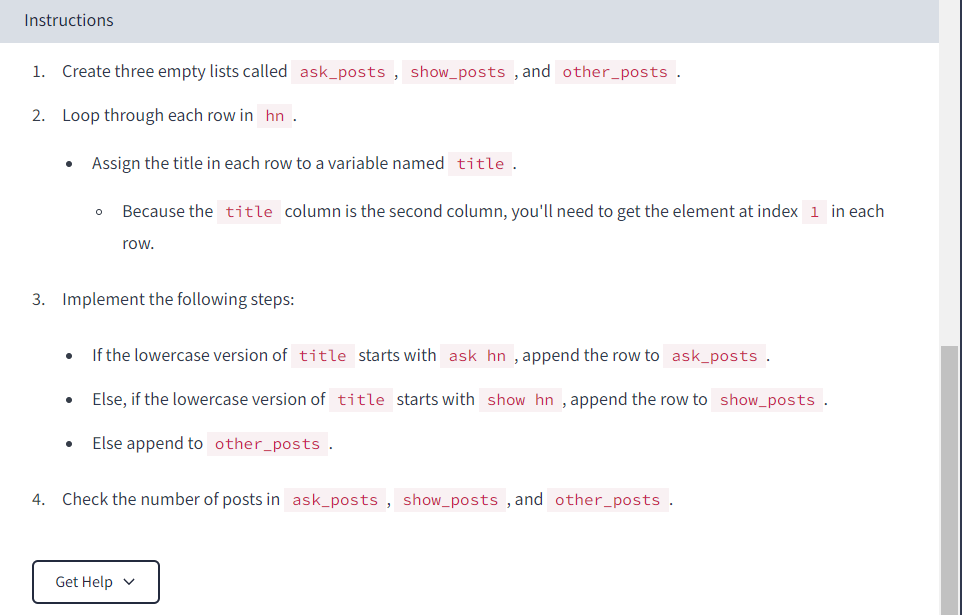

In [3]:
# Create three empty lists called ask_posts, show_posts, and other_posts.
ask_posts = []
show_posts = []
other_posts = []

# Loop through each row in hn
for row in hn:
    
    # Assign the title in each row to a variable named title.
    # Because the title column is the second column, you'll need to get the element at index 1 in each row.
    title = row[1]
    
    # If the lowercase version of title starts with ask hn, append the row to ask_posts
    # Else, if the lowercase version of title starts with show hn, append the row to show_posts.
    # Else append to other_posts.
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        

# Check the number of posts in ask_posts, show_posts, and other_posts.
print("Number of {post_type} = {num_posts}".format(post_type='ask_posts', num_posts=len(ask_posts)))
print("Number of {post_type} = {num_posts}".format(post_type='show_posts', num_posts=len(show_posts)))
print("Number of {post_type} = {num_posts}".format(post_type='other_posts', num_posts=len(other_posts)))

print()
print(ask_posts[:5])
print()
print(show_posts[:5])
print()

Number of ask_posts = 1744
Number of show_posts = 1162
Number of other_posts = 17194

[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14'], ['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'], ['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']]

[['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'], ['11590768', 'Show HN: 

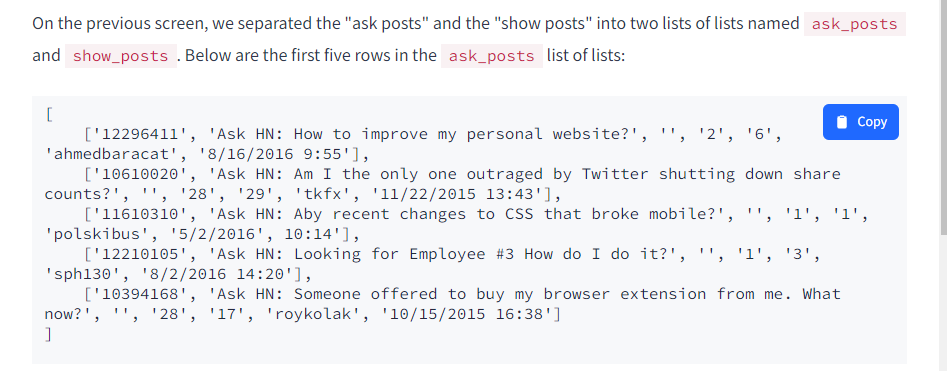

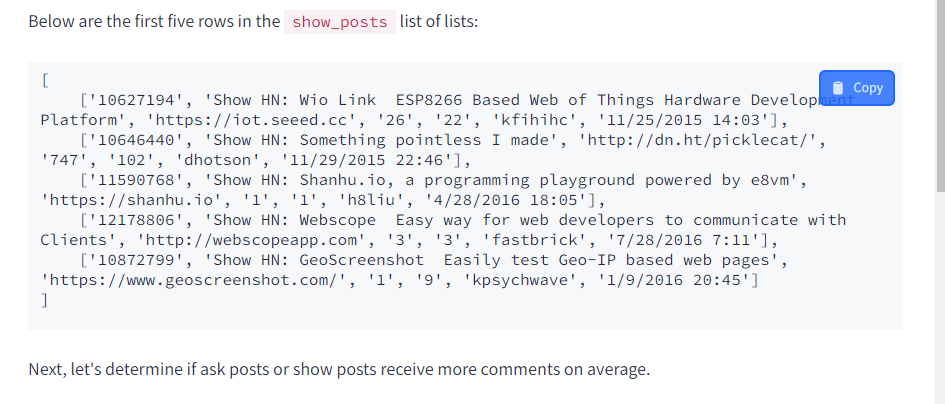

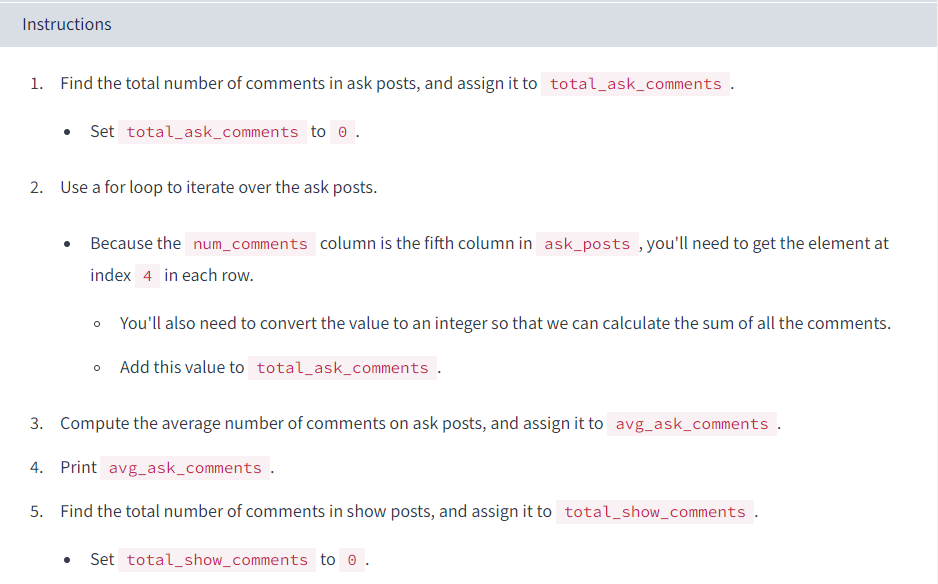

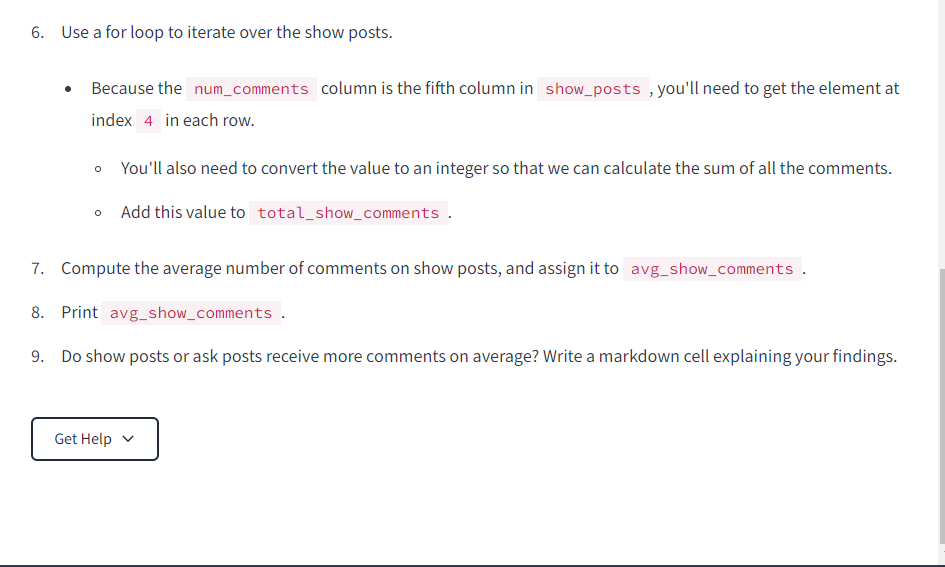

In [4]:
# [Find the total number of comments in ask posts, and assign it to total_ask_comments.]

# Set total_ask_comments to 0
total_ask_comments = 0

# Use a for loop to iterate over the ask posts.
for row in ask_posts:
    
    # Because the num_comments column is the fifth column in ask_posts, you'll need to get the element at index 4 in each row.
    # You'll also need to convert the value to an integer so that we can calculate the sum of all the comments.
    # Add this value to total_ask_comments.
    num_comments = int(row[4])
    total_ask_comments += num_comments

# Compute the average number of comments on ask posts, and assign it to avg_ask_comments.
avg_ask_comments = total_ask_comments / len(ask_posts)

# Print avg_ask_comments.
print(avg_ask_comments)

####################################################################################################
    
# [Find the total number of comments in show posts, and assign it to total_show_comments.]    

# Set total_show_comments to 0.
total_show_comments = 0

# Use a for loop to iterate over the show posts.
for row in show_posts:
    
    # Because the num_comments column is the fifth column in show_posts, you'll need to get the element at index 4 in each row.
    # You'll also need to convert the value to an integer so that we can calculate the sum of all the comments.
    # Add this value to total_show_comments.
    num_comments = int(row[4])
    total_show_comments += num_comments
    
# Compute the average number of comments on show posts, and assign it to avg_show_comments.
avg_show_comments = total_show_comments / len(show_posts)

# Print avg_show_comments.
print(avg_show_comments)



14.038417431192661
10.31669535283993


In [5]:
# Do show posts or ask posts receive more comments on average? Write a markdown cell explaining your findings.

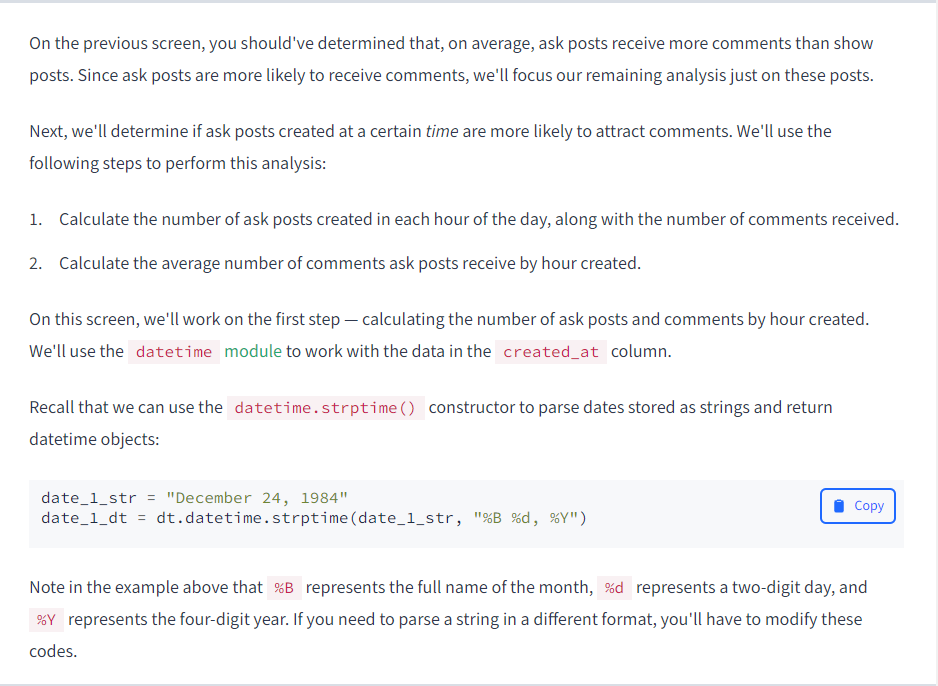

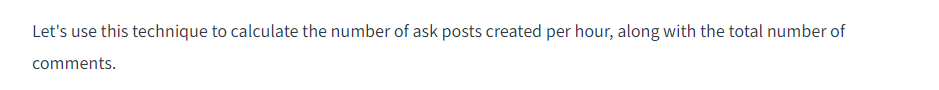


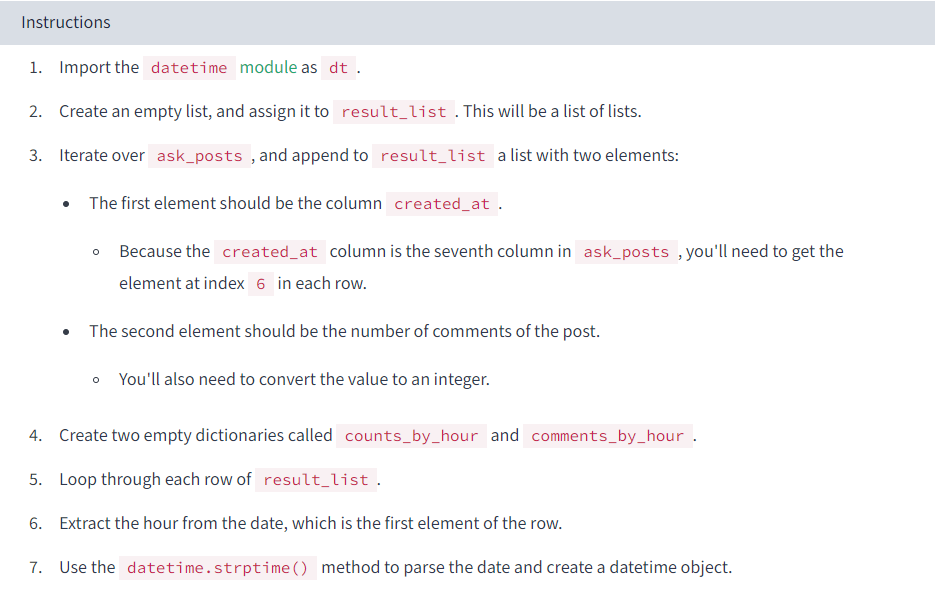

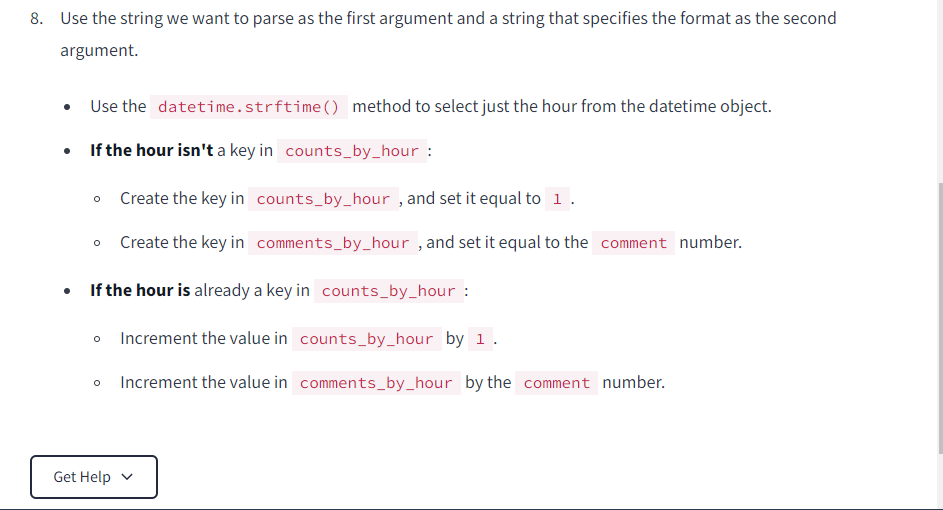

In [11]:
# Import the datetime module as dt.
import datetime as dt

# Create an empty list, and assign it to result_list. This will be a list of lists.
result_list = []

# Iterate over ask_posts, and append to result_list a list with two elements:

    # The first element should be the column created_at.
    # Because the created_at column is the seventh column in ask_posts, you'll need to get the element at index 6 in each row.
    
    # The second element should be the number of comments of the post.
    # You'll also need to convert the value to an integer.

for row in ask_posts:
    created_at = row[6]
    num_comments = int(row[4])
    result_list.append([created_at, num_comments])

# print(result_list[:5])

# Create two empty dictionaries called counts_by_hour and comments_by_hour.
counts_by_hour = {}
comments_by_hour = {}

# Loop through each row of result_list.
for row in result_list:
    
    # Extract the hour from the date, which is the first element of the row.
    # Use the datetime.strptime() method to parse the date and create a datetime object.
    # Use the string we want to parse as the first argument and a string that specifies the format as the second argument.
    date_str = row[0] # created_at datatime
    date = dt.datetime.strptime(date_str, "%m/%d/%Y %H:%M")
    
    # Use the datetime.strftime() method to select just the hour from the datetime object.
    hour = date.strftime("%H")
    
    # If the hour isn't a key in counts_by_hour:
        # Create the key in counts_by_hour, and set it equal to 1.
        # Create the key in comments_by_hour, and set it equal to the comment number.
        
    # If the hour is already a key in counts_by_hour:
        # Increment the value in counts_by_hour by 1.
        # Increment the value in comments_by_hour by the comment number.
        
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1] # number of comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += row[1] # number of comments

print(counts_by_hour)
print(comments_by_hour)

print(len(counts_by_hour))
print(len(comments_by_hour))

{'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
{'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}
24
24


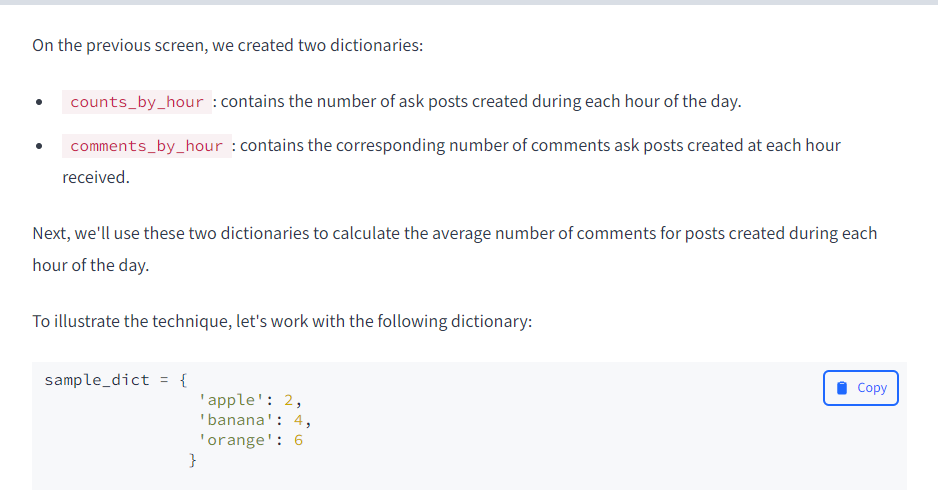

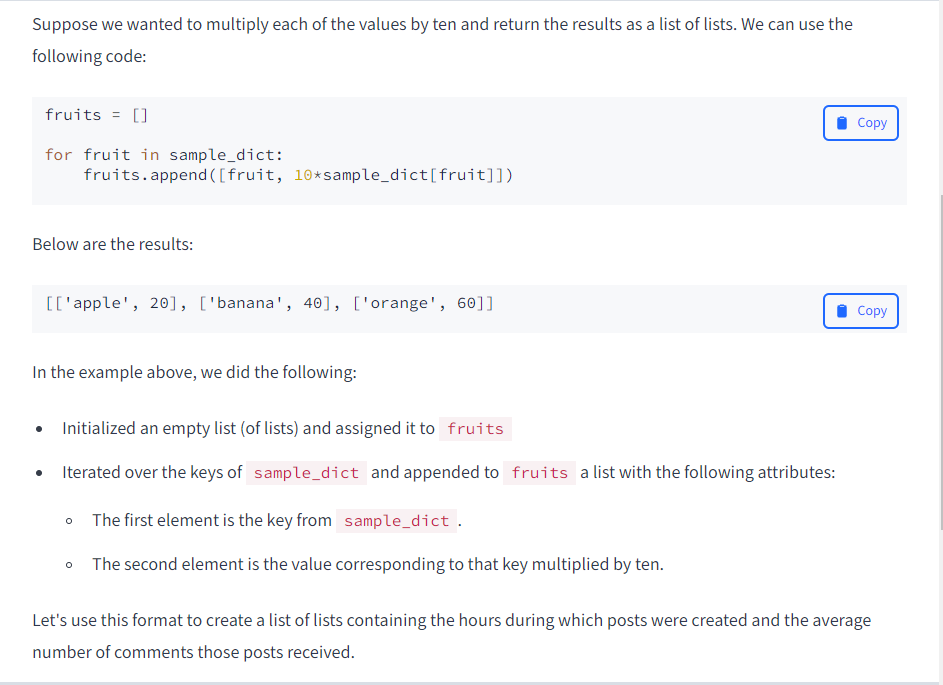

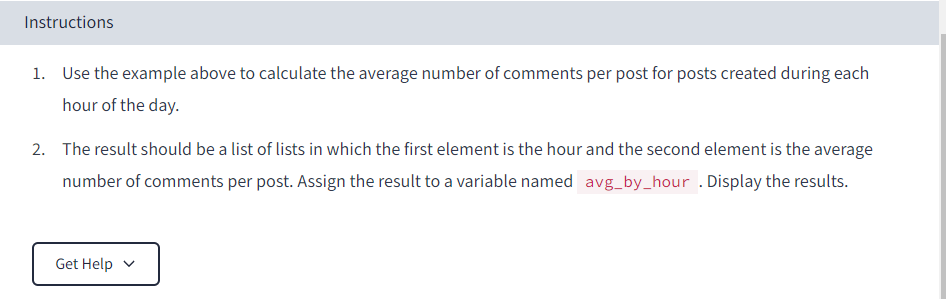

In [12]:
avg_by_hour = []

for hour,num_comments in comments_by_hour.items():
    
    count = counts_by_hour[hour] # fetching the number of occurrence of a particular hour    
    
    avg = num_comments/count
    avg_by_hour.append([hour, avg])

for row in avg_by_hour:
    print(row)

['09', 5.5777777777777775]
['13', 14.741176470588234]
['10', 13.440677966101696]
['14', 13.233644859813085]
['16', 16.796296296296298]
['23', 7.985294117647059]
['12', 9.41095890410959]
['17', 11.46]
['15', 38.5948275862069]
['21', 16.009174311926607]
['20', 21.525]
['02', 23.810344827586206]
['18', 13.20183486238532]
['03', 7.796296296296297]
['05', 10.08695652173913]
['19', 10.8]
['01', 11.383333333333333]
['22', 6.746478873239437]
['08', 10.25]
['04', 7.170212765957447]
['00', 8.127272727272727]
['06', 9.022727272727273]
['07', 7.852941176470588]
['11', 11.051724137931034]


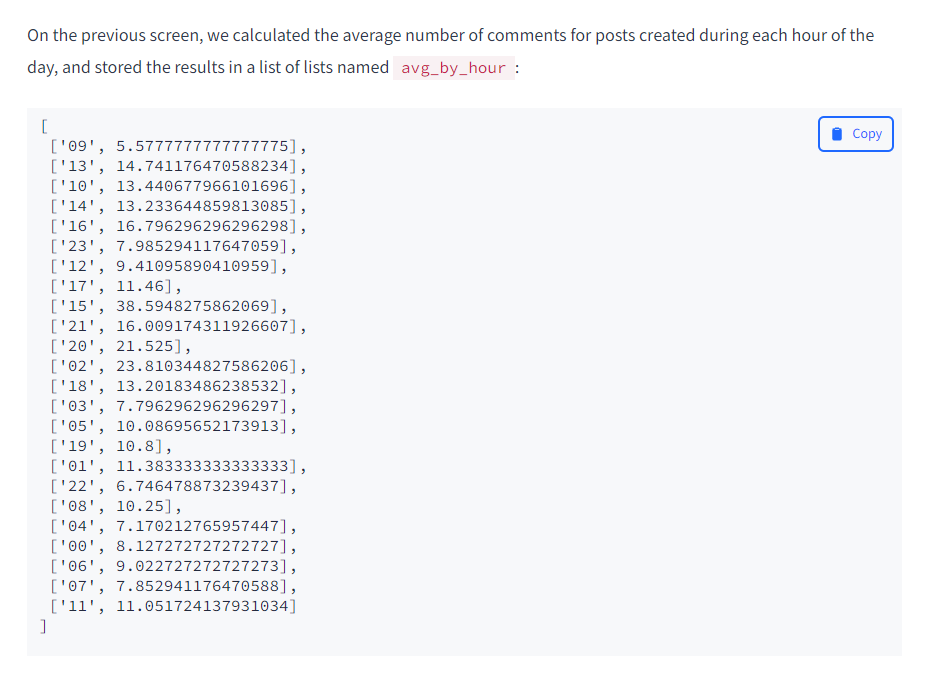

Although we now have the results we need, this format makes it difficult to identify the hours with the highest values. Let's finish by sorting the list of lists and printing the five highest values in a format that's easier to read.

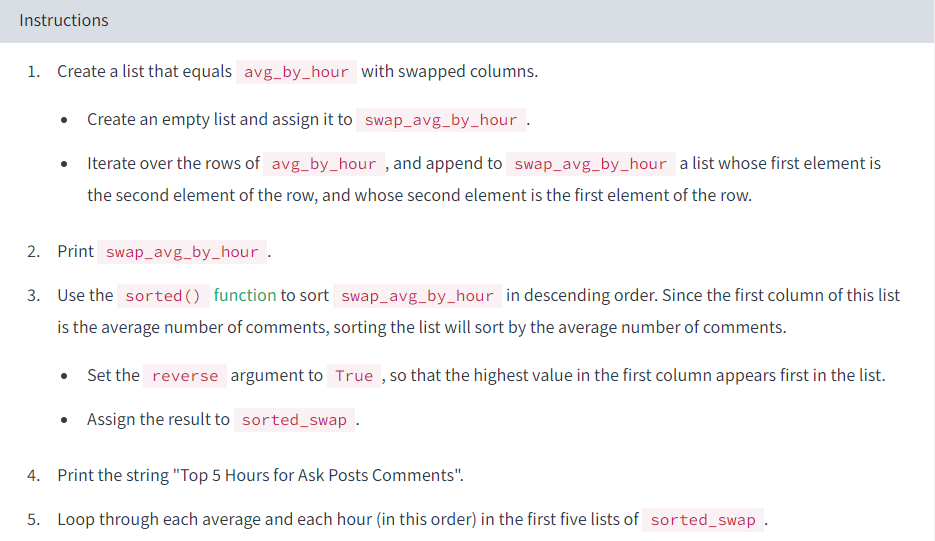

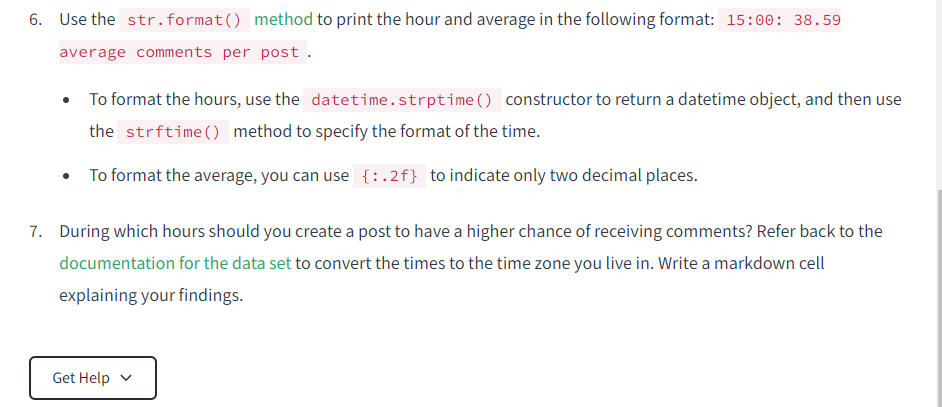

 ### [sorted() function](https://docs.python.org/3/library/functions.html#sorted)
 
 ### [ str.format() method ](https://docs.python.org/3/library/stdtypes.html#str.format)
 
 ### [documentation for the data set](https://www.kaggle.com/hacker-news/hacker-news-posts)
 

In [20]:
# Create a list that equals avg_by_hour with swapped columns.
    # Create an empty list and assign it to swap_avg_by_hour.
    # Iterate over the rows of avg_by_hour, and append to swap_avg_by_hour a list 
        # whose first element is the second element of the row, and whose second element is the first element of the row.

swap_avg_by_hour = []
for row in avg_by_hour:
    my_list = [row[1],row[0]]
    swap_avg_by_hour.append(my_list)
    
# Print swap_avg_by_hour.
print()
print(swap_avg_by_hour)
print()

# Use the sorted() function to sort swap_avg_by_hour in descending order. 
# Since the first column of this list is the average number of comments, sorting the list will sort by the average number of comments.

# Set the reverse argument to True, so that the highest value in the first column appears first in the list.
# Assign the result to sorted_swap.

sorted_swap = sorted(swap_avg_by_hour, reverse=True)

# Print the string "Top 5 Hours for Ask Posts Comments".
print()
print("Top 5 Hours for Ask Posts Comments")
print()

# Import the datetime module as dt.
import datetime as dt

# Loop through each average and each hour (in this order) in the first five lists of sorted_swap.

    # Use the str.format() method to print the hour and average in the following format: 15:00: 38.59 average comments per post.
    
        # To format the hours, use the datetime.strptime() constructor to return a datetime object, 
        # and then use the strftime() method to specify the format of the time.
        
        # To format the average, you can use {:.2f} to indicate only two decimal places.

output = "{HOUR} {AVERAGE:.2f} average comments per post"
for row in sorted_swap[:5]:
    avg = row[0]
    hr = row[1]
    date_object = dt.datetime.strptime(hr,"%H")
    hour = date_object.strftime("%H:00:")
    print(output.format(HOUR=hour, AVERAGE=avg))
    

    
    
    
    


[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


Top 5 Hours for Ask Posts Comments

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


### That's it for the guided steps! Here's a quick summary of what we accomplished in this guided project:

* We set a goal for the project.
* We collected and sorted the data.
* We reformatted and cleaned the data to prepare it for analysis.
* We analyzed the data.

Curious to see what other students have done on this project? [Head over to our Community to check them out.](https://community.dataquest.io/tags/c/social/share/49/356) While you are there, please give your own feedback!

And of course, we welcome you to share your own project and show off your hard work. Head over to our Community to [share your finished Guided Project!](https://community.dataquest.io/tags/c/social/share/49/356)

You can use guided projects to build a portfolio to showcase to potential employers, so we encourage you to keep working on this. Here are some next steps for you to consider:

* Determine if show or ask posts receive more points on average.
* Determine if posts created at a certain time are more likely to receive more points.
* Compare your results to the average number of comments and points other posts receive.
* Use Dataquest's [data science project style guide](https://www.dataquest.io/blog/data-science-project-style-guide/) to format your project.

You're welcome to keep working on the project here, but we recommend downloading it to your computer using the download icon above the notebook and working on it locally.

If you choose to work on the next steps independently, you'll inevitably not know how to perform certain tasks or hit errors that you won't know how to resolve. Don't feel discouraged! This is part of the learning process. Although referring to other lessons is a great way to refresh your memory on certain topics, there are also some tools you should practice using because you'll need to use them in a real-world job setting.

The best thing to do if you hit an error you can't resolve or don't know how to perform a task is search for the answer on Google. When you search, make sure to include the word "python" — otherwise, you'll get results from other programming languages.

As you search, you'll see one site constantly appear at the top of the results — Stack Overflow. Stack Overflow is an online community where people ask and answer programming questions. In most situations, you'll find that someone has asked the same question as you — or a similar question that can help you. The community is very active, so the answers are almost always accurate.

Congratulations, this is the end of the course!